4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 12s 17ms/step - loss: 0.5606 - accuracy: 0.8062 - val_loss: 0.4499 - val_accuracy: 0.8448
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.3901 - accuracy: 0.8611 - val_loss: 0.3867 - val_accuracy: 0.8635
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3483 - accuracy: 0.8744 - val_loss: 0.3803 - val_accuracy: 0.8648
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8824 - val_loss: 0.3668 - val_accuracy: 0.8672
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3031 - accuracy: 0.8895 - val_loss: 0.3606 - val_accuracy: 0.8708
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2912 - accuracy: 0.8935 - val_loss: 0.3551 - val_accuracy: 0.8743
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2785 

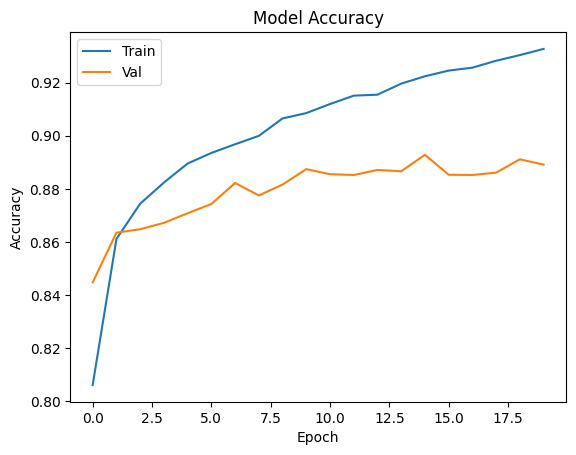

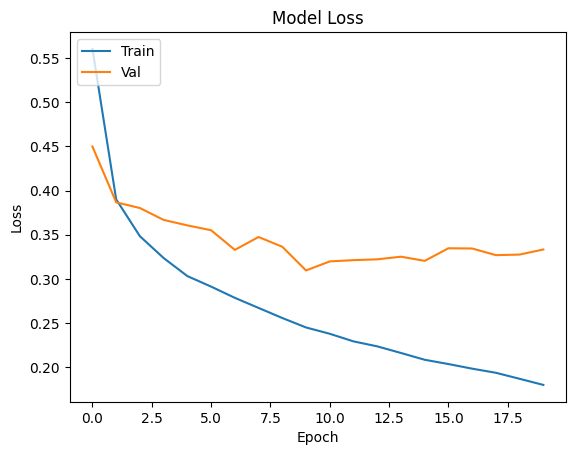

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Flatten the images for the ANN
X_train = X_train.reshape(60000, 784) # 28x28
X_test = X_test.reshape(10000, 784) # 28x28

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
